# **AP157 Machine Learning Lab Assignment**
## Module A.3: Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 25 and 75 points, respectively).

_Credits_: This assignment is based on the scikit-learn tutorial "Dimensionality Reduction of Astronomical Spectra" ([link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html))

### Student Information

_Full Name (Last Name, First Name)_: Mendoza, Chris Andrew\
_Student No._: 2019-02636\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: March 05, 2024 11:59 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Chris Andrew Mendoza

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/25
* Part 2 - []/75

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy spectra data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the file ```spec4000_use.npz``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```spec4000_corrected.npz``` from your Google Drive folder.

First, mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

 1080652.jpg
'132 PROB SETS'
'151 Problem Set 1.pdf'
'165 Camera Setup'
'167 Activity 6: Color Science '
'170 Problem Set 1.pdf'
 184
 184_act_1
 191_Data
'191 Set A'
'191 - SET C EXPERIMENTS'
'192 Exp 2'
'192 Experiment 3'
'192 Experiment 3 (New Data)'
 192_SetB_Exp3.xlsx
'192 Set B - Experiment 3.gsheet'
 192_SetC_Experiment_1.gsheet
 20210709_190543.jpg
 20210709_190732.jpg
 20210713_010723.jpg
 20210724_020633.jpg
 20220503_174636.jpg
 20220503_175058.jpg
 20230126_102907.jpg
 20230227_170223.jpg
 20230227_170245.jpg
 20230315_170009.jpg
 20230606_233247.jpg
 20230607_173628.jpg
 20230719_204157.jpg
 20230719_204250.jpg
 20230719_205910.mp4
 20230719_210316.jpg
 20230719_210317.jpg
 20230719_211938.mp4
 20230719_213138.mp4
 20230719_214628.mp4
 20230719_223236.jpg
 20230725_201704.jpg
 20230725_201745.jpg
 20230725_201807.jpg
 20230725_202037.jpg
 20230725_202114.jpg
 20230726_150843.jpg
 20230726_150903.jpg
 20230727_155604.jpg
 20230727_155849.jpg
 20230727_155901.jpg
 20230727_1

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/App Physics 157/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.


In [ ]:
import numpy as np
data = np.load(file_path + 'spec4000_corrected.npz')

The NpzFile object is a dictionary-like object which can be queried for its list of arrays and the arrays themselves ([reference](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)). Our object contains two arrays: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [ ]:
data.files

['spec_recons', 'wavelength']

In [ ]:
np.shape(data['spec_recons']), np.shape(data['wavelength'])

((4000, 1000), (1000,))

Let's plot the first few spectra to visualize our data

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Sample SDSS spectra')

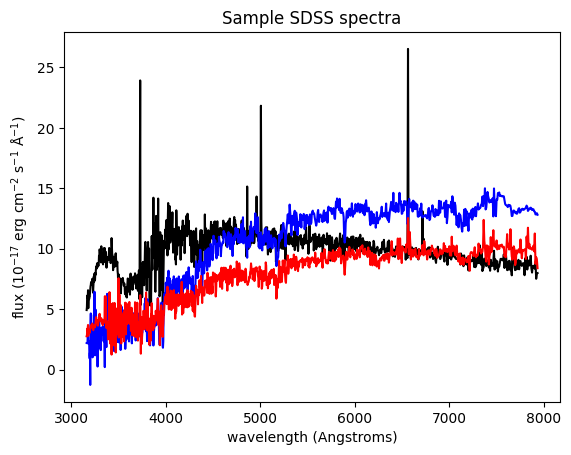

In [ ]:
wavelength = data['wavelength']
flux0 = data['spec_recons'][0,:]
flux1 = data['spec_recons'][1,:]
flux2 = data['spec_recons'][2,:]

plt.plot(wavelength, flux0, 'k-')
plt.plot(wavelength, flux1, 'b-')
plt.plot(wavelength, flux2, 'r-')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")

#### PART 1 - Get mean normalized spectrum *(25 pts.)*

Plot the mean spectrum by first normalizing the spectra and plot the mean and standard deviation. For this, you may use the ``normalize`` function in scikit-learn's preprocessing module [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?


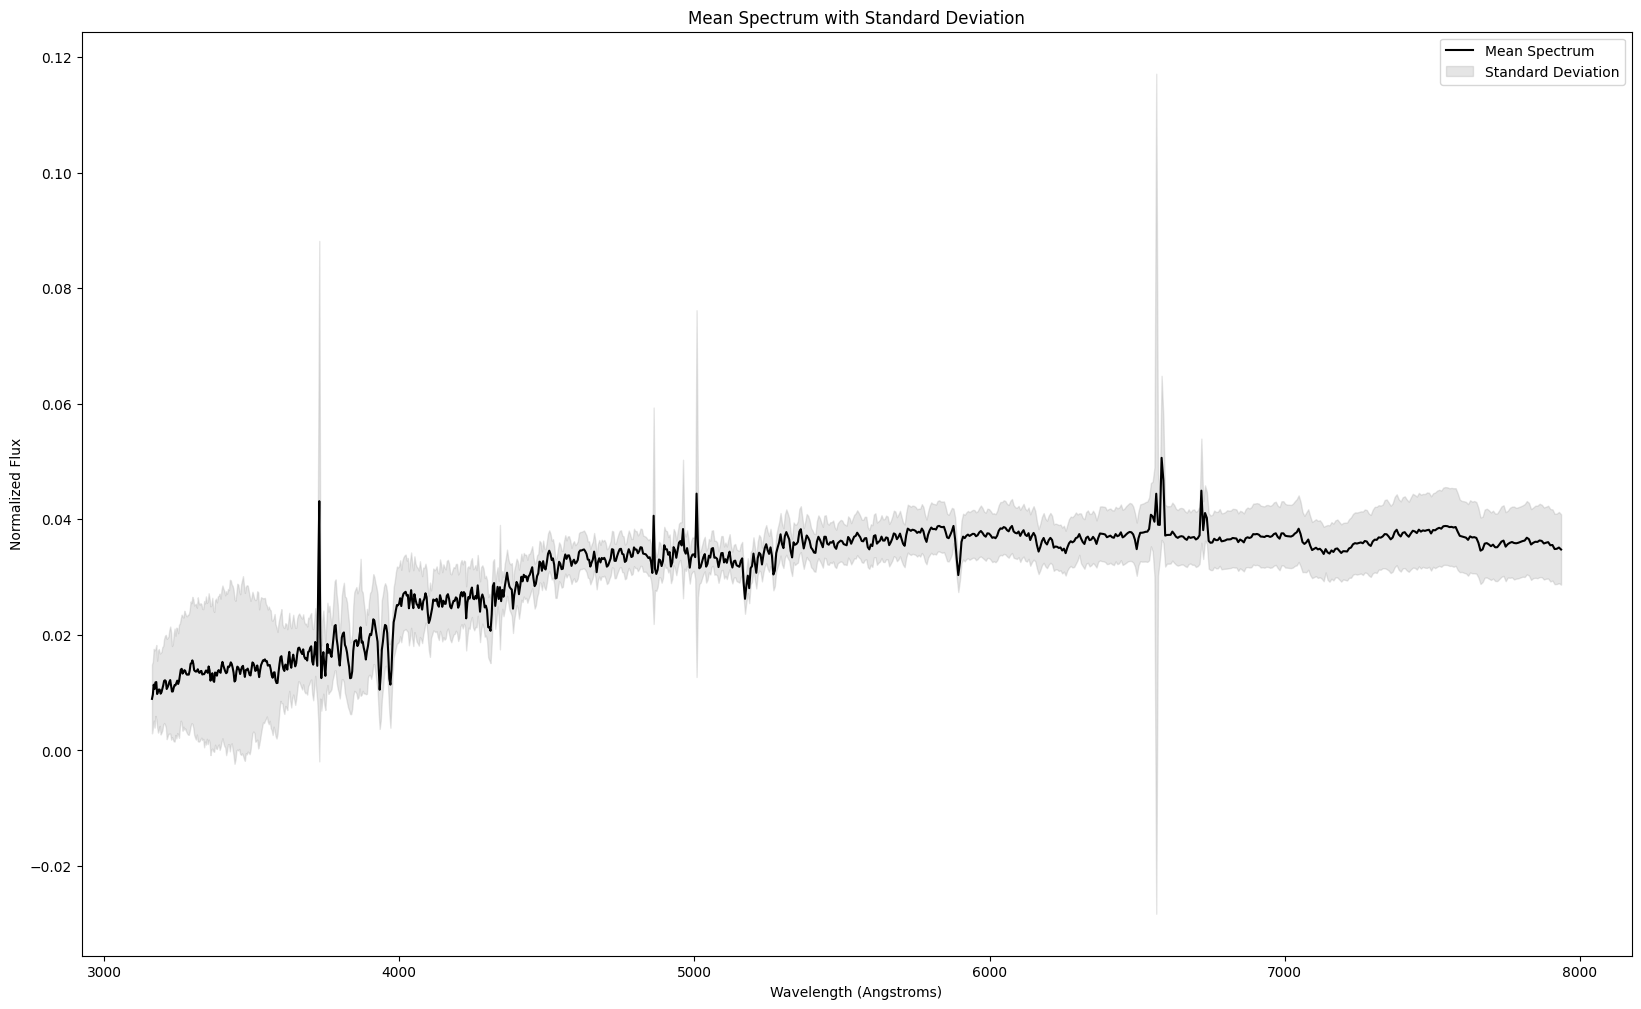

In [ ]:
from sklearn.preprocessing import normalize

# Normalize the spectra
normalized_spectra = normalize(data['spec_recons'], axis=1, norm='l2')

# Calculate the mean and standard deviation
mean_spectrum = np.mean(normalized_spectra, axis=0)
std_spectrum = np.std(normalized_spectra, axis=0)

# Plot the mean spectrum and standard deviation
plt.figure(figsize=(20, 12))
plt.plot(wavelength, mean_spectrum, 'k-', label='Mean Spectrum')
plt.fill_between(wavelength, mean_spectrum - std_spectrum, mean_spectrum + std_spectrum, color='gray', alpha=0.2, label='Standard Deviation') # Plots the standard deviation on the graph

plt.ylabel("Normalized Flux")
plt.xlabel("Wavelength (Angstroms)")
plt.title("Mean Spectrum with Standard Deviation")
plt.legend()
plt.show()


In [ ]:
max_variability_wavelength = wavelength[np.argmax(std_spectrum)]
print(f"Wavelength with highest variation: {max_variability_wavelength} Angstroms")

Wavelength with highest variation: 6564.47501951699 Angstroms


# **Discussion for Part 1**

We can see in the plot that the flux generally increases with the wavelength. However, it can also be observed that large variations occur at several wavelength values, to be particular, at around the 3700-3800, 5000-5100, and 6500-6600 Angstroms ranges. Using the .argmax() fucntion, we accurately discovered that the highest variation occurs at a wavelength of 6564 Angstroms. According to the section in scikit-learn dedicated to "Dimensionality Reduction of Astronomical Spectra", the line at 6563 is known as Hydrogen-α, and is often seen in emission (spiking up) in quasars and other active galaxies [1]. With this, we conclude that the largest variations observed on the plot occur on the wavelength (6564 Angstroms) where hydrogen emits and absorbs photons (variations is greatest for hydrogen since hydrogen is by far the most abundant atom in the universe). The other variations may be due to other atoms such as oxygen emitting and absorbing photons.


Reference(s):

[1] Dimensionality reduction of astronomical spectra — scikit-learn 0.11-git documentation. (n.d.). Site not found · GitHub Pages. https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html#dimensionality-reduction-of-astronomical-spectra

#### PART 2 - Get principal components *(75 pts.)*

Perform Principal Component Analysis (PCA) and visualize the top principal components:
1. Get the first 4 principal components using the ``PCA`` function in scikit-learn's decomposition module [(documentation)](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Make sure to use the normalized spectra as input. *(25 pts.)*


In [ ]:
from sklearn.decomposition import PCA

num_components = 4    # number of principal components we want to get
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(normalized_spectra)

2. Plot the first two principal components (coefficient 1 in the x axis and coefficient 2 in the y axis). Make sure to label the axes and good to set x and y axis limits to be equal. *(25 pts.)*

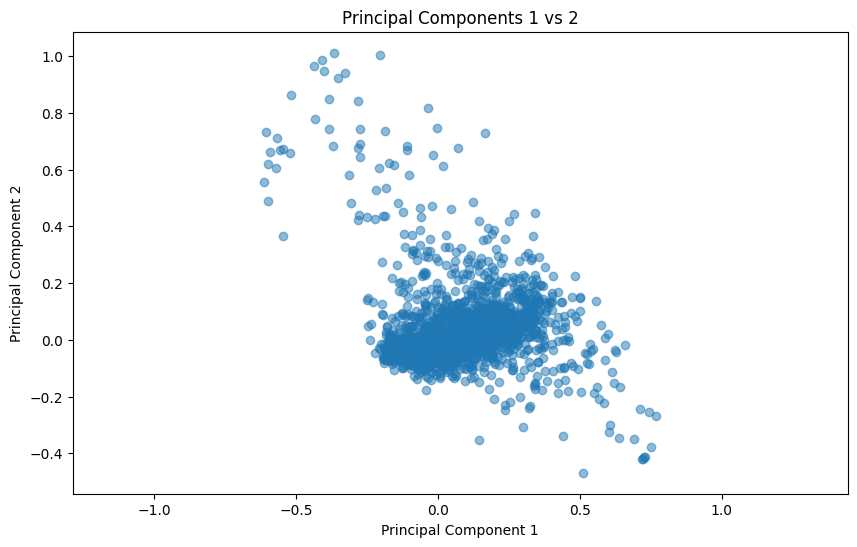

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components 1 vs 2')
plt.axis('equal')
plt.show()

# **Discussion for Part 2**

Here, the plot is showing $a_{i1}$ and $a_{i2}$ where:


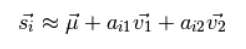 [1]

In order to make sense of these components, we must first visualize the eigenvectors $v_j$


3. Plot the first 4 eigenvectors together with the mean spectrum. Add an arbitrary y-offset between the spectra for clarity. *(25 pts.)*

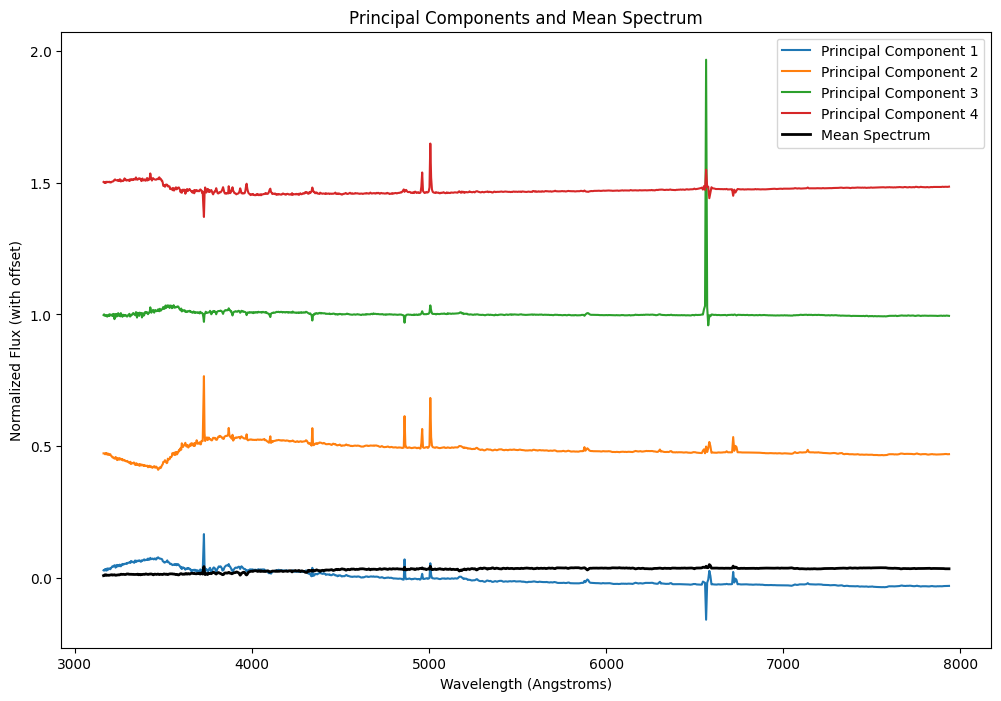

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(num_components):
    plt.plot(wavelength, pca.components_[i] + i * 0.5, label=f'Principal Component {i+1}') # pca.components_[i] + i * 0.5 is the y-offset I used to separate the 4 Principal Components from each other on the plot

plt.plot(wavelength, mean_spectrum, 'k-', label='Mean Spectrum', linewidth=2)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Normalized Flux (with offset)')
plt.title('Principal Components and Mean Spectrum')
plt.legend()
plt.show()

# **Discussion for Part 2 (Continued)**

In the graph above, we have plotted the 4 principal components distinctly with the help of a y-offset. Notice that the first principal axis only shows the general the relative difference in flux between low wavelengths and high wavelengths. For the higher order eigenvectors, however, they act like "filters" to show the emission and absorption characteristics of various atoms that make up the object. It can be thought of that the higher order eigenvectors are sensitive to emission and absorption characteristics of atoms with larger wavelengths (smaller frequency), case in point, the hyrogen-α spectral line can be observed clearly in PC3. Hence, what the higher PCs do is to cancel other frequencies that they are not sensitive to. This is the reason why in the sample plot shown in the section in scikit-learn dedicated to "Dimensionality Reduction of Astronomical Spectra", they also have a plot of the higher PCs along with the mean, but they are labeled as emission galaxy, broad-line QSO, etc.. because they know what atoms correspond to the spectral lines. With each PC having its own sensitivity, they can use the emmission and absorption characteristics to determine what atoms the celestial object being observed is made of.